## Deriving the Equation of the Line

In general, we have some line of best fit $y$ given by:

$$y = a + bx$$

If we have some set of points $(x_1, y_1), (x_2, y_2), (x_3, y_3)...(x_n, y_n)$.  We need to minimize the sum of squares of residuals here, so we would have a number of values determined by:

$$[y_1 - (a + bx_1)]^2 + [y_2 - (a + bx_2)]^2 + [y_3 - (a + bx_3)]^2 + ... $$

which we can rewrite in summation notation as 

$$\sum_{i=1}^n[y_i - (a + bx_i)]^2$$

We can consider this as a function in terms of the variable $a$ that we are seeking to minimize.

$$g(a) = \sum_{i=1}^n[y_i - (a + bx_i)]^2$$

From here, we can apply our familiar strategy of differentiating the function and locating the critical values.  We are looking for the derivative of a sum, which turns out to be equivalent to the sum of the derivatives, hence we have

$$g'(a) = \sum_{i=1}^n \frac{d}{da}[y_i - (a + bx_i)]^2$$

$$g'(a) = \sum_{i=1}^n 2[y_i -a - bx_i](-1)$$

$$g'(a) = -2 [\sum_{i = 1}^n y_i - a - b\sum_{i=1}^n x_i]$$

Setting this equal to zero and solving for $a$ we get

$$a = \frac{1}{n} \sum_{i=1}^n y_i - b\frac{1}{n} \sum_{i=1}^n x_i$$

The terms should be familiar as averages, and we can rewrite our equation as

$$a = \bar{y} - b \bar{x}$$

We now use this to investigate a similar function in terms of $b$ to complete our solution.

$$f(b) = \sum_{i=1}^n[y_i - (\bar{y} + b(x_i - \bar{x}))]^2$$

We end up with 

$$b = \sum_{i = 1}^n \frac{(x_i - \bar{x})(y_i - \bar{y})}{(\bar{x} - x_i)^2}$$

Let's return to the problem of cigarette consumption and test our work out by manually computing $a$ and $b$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd

### Picking Best Line

In [2]:
from sklearn.datasets import make_regression

In [3]:
make_regression?

In [5]:
df = make_regression(n_features=3)

In [7]:
df

(array([[ -8.71357365e-01,  -3.00181650e-01,  -3.54988894e-01],
        [  2.61730537e+00,   6.22044562e-02,   3.76148783e-01],
        [ -9.64943107e-01,  -6.03572369e-01,  -2.16181153e+00],
        [  7.23605760e-01,  -2.11289863e-01,  -3.54034149e-01],
        [ -2.07822378e+00,  -2.40414127e-01,  -3.81329915e-02],
        [ -1.90423168e+00,  -1.17354501e+00,   1.32580687e+00],
        [ -2.45861605e+00,   1.52923419e+00,  -8.07713078e-01],
        [ -1.18963021e+00,   9.94027321e-01,  -4.67352689e-01],
        [ -1.30406883e+00,   8.14529440e-01,  -5.28297047e-01],
        [ -4.41758116e-01,   7.55104478e-01,  -6.11674571e-01],
        [ -5.13213244e-01,  -5.14303383e-02,   6.97655416e-01],
        [  9.73413012e-01,  -2.25830612e-01,   2.32977333e+00],
        [ -3.10758900e-01,  -4.66006163e-01,   1.01104746e+00],
        [ -9.69058938e-01,   2.25088750e+00,   4.19704788e-01],
        [ -6.02299680e-01,   1.23645321e+00,   1.89343743e+00],
        [  1.58670850e+00,  -1.75652107e

In [6]:
X = df[0][:, 0]
y = df[0][:, 2]

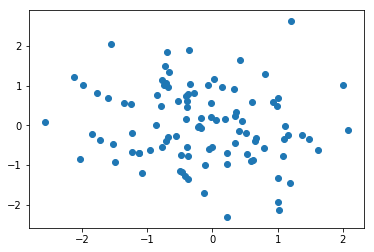

In [5]:
plt.scatter(X, y)

We use a Python function to fit a line such that distance between the line and each point (squared) is minimized. After doing this we can plot the value of the line versus the actual data point to check our error. 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression?

In [ ]:
lr = LinearRegression

In [10]:
lr = LinearRegression() # "Instantiates" an empty instance of the regression.

In [11]:
lr.fit(X.reshape(-1,1), y) #We've now fit the model with the data.
# reshape method is needed when the X array is 1-dimensional--not sure why, need to Google it.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
y_pred = lr.predict(X.reshape(-1,1))
#creates an array of predicted Y values

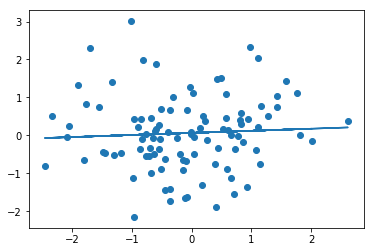

In [13]:
plt.scatter(X,y) #plots the data
plt.plot(X, y_pred)

In [14]:
diffs = y- y_pred # calculates actual residuals
type(diffs)

numpy.ndarray

In [15]:
np.mean(diffs)  # also diff.mean()

0.0

(array([  6.,   5.,  11.,  25.,  25.,  12.,  10.,   3.,   2.,   1.]),
 array([-2.174232  , -1.6557539 , -1.1372758 , -0.6187977 , -0.1003196 ,
         0.4181585 ,  0.9366366 ,  1.45511471,  1.97359281,  2.49207091,
         3.01054901]),
 <a list of 10 Patch objects>)

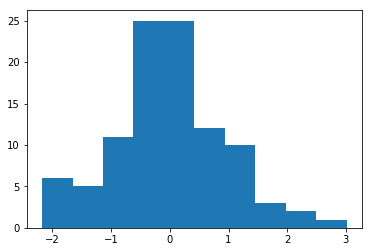

In [16]:
plt.hist(diffs) # histogram of actual residuals.  It should be roughly normal, otherwise it means that the model is better
# at predicting some values than others.

### Residual Shape

In [17]:
#mean squared error--a method of measuring the error of the model
from sklearn.metrics import mean_squared_error

In [18]:
mse = mean_squared_error(y_pred, y) #Calculates the mean-squared error between Y and Predicted-Y.
rmse = np.sqrt(mse) # Takes the square root of mse to find RMS error.

In [19]:
print('The mean squared error is: {:.2f}'.format(mse, "\n"))

#Figure out how to make this work.

The mean squared error is: 0.94


## Other Situations

Our goal with regression is to identify situations where regression makes sense, fit models and discuss the reasonableness of the model for describing the data.  Data does not always come in linear forms however.  

We can easily generate sample data for familiar curves.  First, we can make some lists of polynomial form, then we will add some noise to these, fit models with `np.polyfit()`, and plot the results.  




### Non-Linear Functions

Plotting and fitting non-linear functions follows a similar pattern, however we need to take into consideration the nature of the function.  First, if we see something following a polynomial pattern, we can just use whatever degree polynomial fit we believe is relevant.  The derivation of these formulas follows the same structure as the linear case, except you are replacing the line $a - bx_i$ with a polynomial $a + bx_i + cx_i^2...$.

If we believe there to be an exponential fit, we can transform this into a linear situation using the logarithm.  For example, suppose we have the following population data.

| Decade $t$ | Year | Population |
| ----- | ------ | ----- |
| 0 | 1780 | 2.8 | 
| 1 | 1790 | 3.9 | 
| 2 | 1800 | 5.3 | 
| 3 | 1810 | 7.2 |

If we examine the data, we see an exponential like trend.  If we use NumPy to find the logarithm of the population values and plot the result, we note the transformed datas similarity to a linear function.

In [23]:
np.arange?

In [24]:
t = np.arange(0,13)  #Google what np.arange "arrange?" does.
year = np.arange(1780,1910,10)
P = [2.8, 3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 39.8, 50.2, 62.9, 76.0]

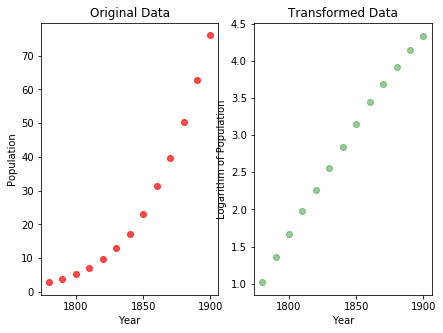

In [25]:
plt.figure(figsize = (7,5))
plt.subplot(1, 2, 1)
plt.scatter(year, P,color = 'red', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title("Original Data")

plt.subplot(1, 2, 2)
lnP = np.log(P)
plt.scatter(year, lnP, color = 'green', alpha = 0.4)
plt.xlabel('Year')
plt.ylabel('Logarithm of Population')
plt.title("Transformed Data")

Symbolically, we would imagine the original function as an exponential of the form

$$y = ae^{bx}$$

The expression can be explored in a similar manner, where we use Sympy to find the effect of the logarithm.

In [26]:
y, a, b, x = sy.symbols('y a b x')

In [27]:
eq = sy.Eq(y, a*sy.exp(b*x))

In [28]:
sy.expand_log(sy.log(b**x))

log(b**x)

In [29]:
sy.expand_log(sy.log(a*sy.exp(b*x)), force = True)

b*x + log(a)

Hence, we have that

$$\log(y) = bx + \log(a)$$

which should look like our familiar linear equations.  Here, we can find $a$ and $b$, then convert the equation back to its original form by undoing the logarithm with the exponential.

For kicks, we introduce the SciPy `linregress` function.  Feel free to examine the help documentation for the function.  This gives a little more information about the model than the `polyfit` function.  Further, we add text to the plot to display information about the model.

In [30]:
line = np.polyfit(year, lnP, 1)
fit = np.polyval(line, year)

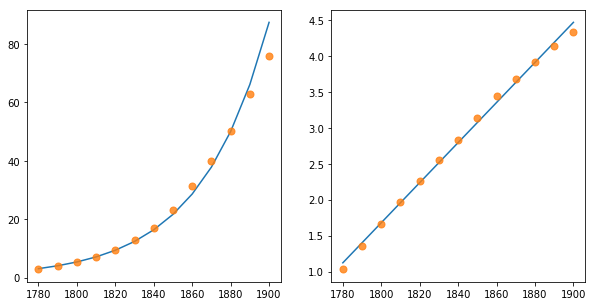

In [31]:
fig = plt.figure(figsize = (10,5))

fig.add_subplot(121)
plt.plot(year, np.exp(fit))
plt.plot(year, P, 'o', markersize = 7, alpha = 0.8)

fig.add_subplot(122)
plt.plot(year, fit)
plt.plot(year, lnP, 'o', markersize = 7, alpha = 0.8)

## Logistic Example

As you see above, towards the end of our model the actual and predicted values seem to diverge.  Considering the context, this makes sense.  A population should reach some maximum levels due to physical resources.  A more S shaped curve is the logistic function which is given by 

$$y = \frac{L}{1 + e^{a+bx}}$$

As an example, consider the Inter Continental Ballistic Missle Data for 1960 - 1969.

| Year | Number of ICBM's |
| --- | --- |
| 1960 | 18 |
| 1961 | 63 |
| 1962 | 294 |
| 1963 | 424 |
| 1964 | 834 |
| 1965 | 854 |
| 1966 | 904 |
| 1967 | 1054 |
| 1968 | 1054 |
| 1969 | 1054 |

In [32]:
year = [i for i in np.arange(1960, 1970, 1)]
icbm = [18, 63, 294, 424, 834, 854, 904, 1054, 1054, 1054]

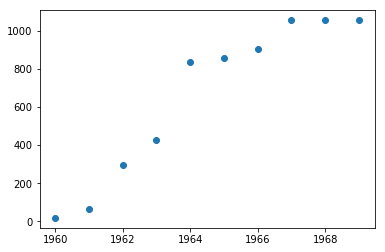

In [33]:
plt.scatter(year, icbm)

In [34]:
L, y, a, b, x = sy.symbols('L y a b x')

In [35]:
sy.symbols?

In [36]:
exp = sy.Eq(y, L/(1 + sy.exp(a + b*x)))

In [37]:
sy.solve(exp, (a + b*x),  force = True)

[log((L - y)/y)]

This means that the tranformation that linearizes our data is 

$$\log(\frac{L - y}{y})$$

The value $L$ is defined as the *carrying capacity* of the model.  Here, it seems something like $L = 1060$ would be a reasonable value to try.  

In [38]:
t_icbm = [np.log((1060 - i)/i) for i in icbm]

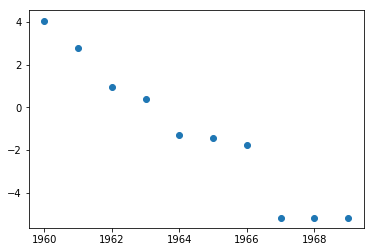

In [39]:
plt.scatter(year, t_icbm)

In [40]:
b, a = np.polyfit(year, t_icbm, 1)

In [41]:
a, b

(2091.7866057847828, -1.0653944179379069)

In [42]:
def l(x):
    return b*x + a

l(1960), l(1969)

(3.6135466264850038, -5.9750031349558412)

In [43]:
fit = [l(i) for i in year]

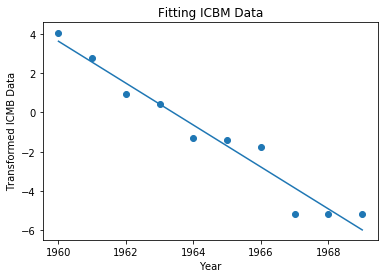

In [44]:
plt.scatter(year, t_icbm)
plt.plot(year, fit)
plt.title("Fitting ICBM Data")
plt.xlabel("Year")
plt.ylabel("Transformed ICMB Data")

Much like the last example, we can return everything to its original form with the exponential.  We arrive at the equation

$$y = \frac{1060}{1 + e^{2092 - 1.0654x}}$$

In [45]:
def y(x):
    return 1060/(1 + np.exp(2092 - 1.0654*x))

o_fit = [y(i) for i in year]

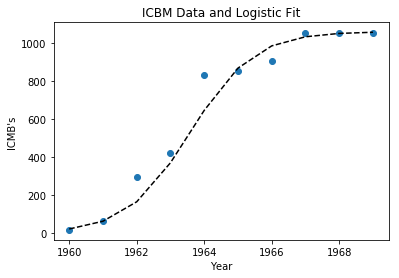

In [46]:
plt.scatter(year, icbm)
plt.plot(year, o_fit, '--k')
plt.title("ICBM Data and Logistic Fit")
plt.xlabel("Year")
plt.ylabel("ICMB's")

### Example

The dataset below contains historical data dealing with some basic human development indicies.  Your goal is to explore the relationship between life expectancy and GDP.  Examine a linear regression model that you build on the most recent data comparing GDP per capita and life expectancy.

In [47]:
gap = pd.read_csv('data/gapminder_all.csv')

In [48]:
gap.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [49]:
gap_lr = LinearRegression()
X=gap.gdpPercap_1952
Y=gap.lifeExp_1952

In [50]:
gap_lr.fit(X.values.reshape(-1,1), Y) #We've now fit the model with the data.
gap_pred = gap_lr.predict(X.values.reshape(-1,1))
mse = mean_squared_error(gap_pred, Y)
mse.mean()
np.sqrt(mse.mean())

11.702513196248493

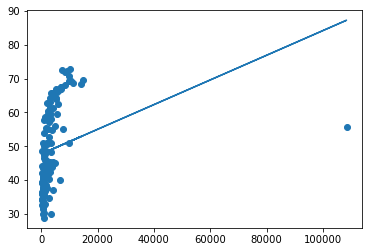

In [51]:
plt.scatter(X,Y)
plt.plot(X, gap_pred)

In [52]:
X = gap.lifeExp_2007
Y = np.log(gap.gdpPercap_2007)
gap_lr = LinearRegression()

In [53]:
gap_lr.fit(X.values.reshape(-1,1), Y) #We've now fit the model with the data.
gap_pred = gap_lr.predict(X.values.reshape(-1,1))
mse = mean_squared_error(gap_pred, Y)
mse.mean()
np.sqrt(mse.mean())

0.79428038731987072

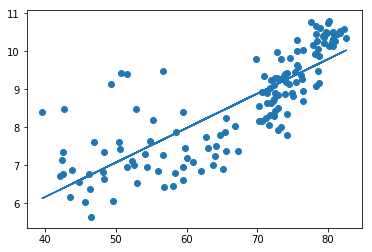

In [54]:
plt.scatter(X,Y)
plt.plot(X, gap_pred)

#    #  tHE above isn't that great--use the below for notes
   

In [55]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [56]:
cali = fetch_california_housing()

In [57]:
cali_houses = pd.DataFrame(cali.data, columns = cali.feature_names)
cali_houses.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
cali_houses['housing_price'] = cali.target

In [59]:
y = cali_houses.housing_price
X = cali_houses.MedInc

In [60]:
lr = LinearRegression()
lr.fit(X.values.reshape(-1,1), y) #We've now fit the model with the data.
y_pred = lr.predict(X.values.reshape(-1,1))
mse = mean_squared_error(y_pred, y)
mse.mean()
np.sqrt(mse.mean())

0.83733574526169174

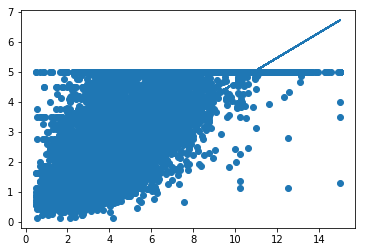

In [61]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [62]:
y = cali_houses.housing_price
X = cali_houses[['AveRooms', 'AveBedrms']]

In [63]:
def basic_lrfit(X, y):
    lr = LinearRegression()
    lr.fit(X, y) #We've now fit the model with the data.
    y_pred = lr.predict(X)
    mse = mean_squared_error(y_pred, y)
    MSE = mse.mean()
    RMSE = np.sqrt(mse.mean())
    print("mean sq. error is", MSE)
    print("RMSE is", RMSE)

In [64]:
basic_lrfit(X,y)

mean sq. error is 1.15514366192
RMSE is 1.0747760985


In [65]:
corr = cali_houses.corr()

In [66]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,housing_price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
housing_price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


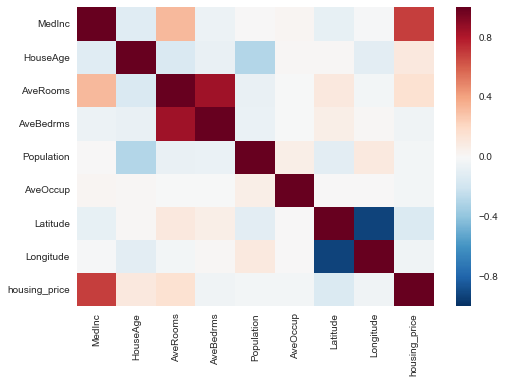

In [67]:
import seaborn as sns
sns.heatmap(corr)